In [0]:
from google.colab import drive    #mounting google drive which has the dataset
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os                             #to manipulate the paths of files
import numpy  
%matplotlib inline
import matplotlib.pyplot as plt     #to plot a few train images
import matplotlib.image as mpimg


In [0]:
#plot and visualize a few dataset images


dataset_path='/content/gdrive/My Drive/dataset'            #root path
train_path='/content/gdrive/My Drive/dataset/training_set'   #train path
test_path='/content/gdrive/My Drive/dataset/test_set'      #validation path

train_mask_path=os.path.join(train_path,'mask')
train_nomask_path=os.path.join(train_path,'nomask')
test_mask_path=os.path.join(test_path,'mask')
test_nomask_path=os.path.join(test_path,'nomask')

train_mask_names=os.listdir(os.path.join(train_path,'mask'))
train_nomask_names=os.listdir(os.path.join(train_path,'nomask'))

test_mask_names=os.listdir(os.path.join(test_path,'mask'))
test_nomask_names=os.listdir(os.path.join(test_path,'nomask'))

print("Length of Training Set is "+str(len(train_mask_names)+len(train_nomask_names)))
print("Length of Testing Set is "+str(len(test_mask_names)+len(test_nomask_names)))


Length of Training Set is 2206
Length of Testing Set is 551


[]

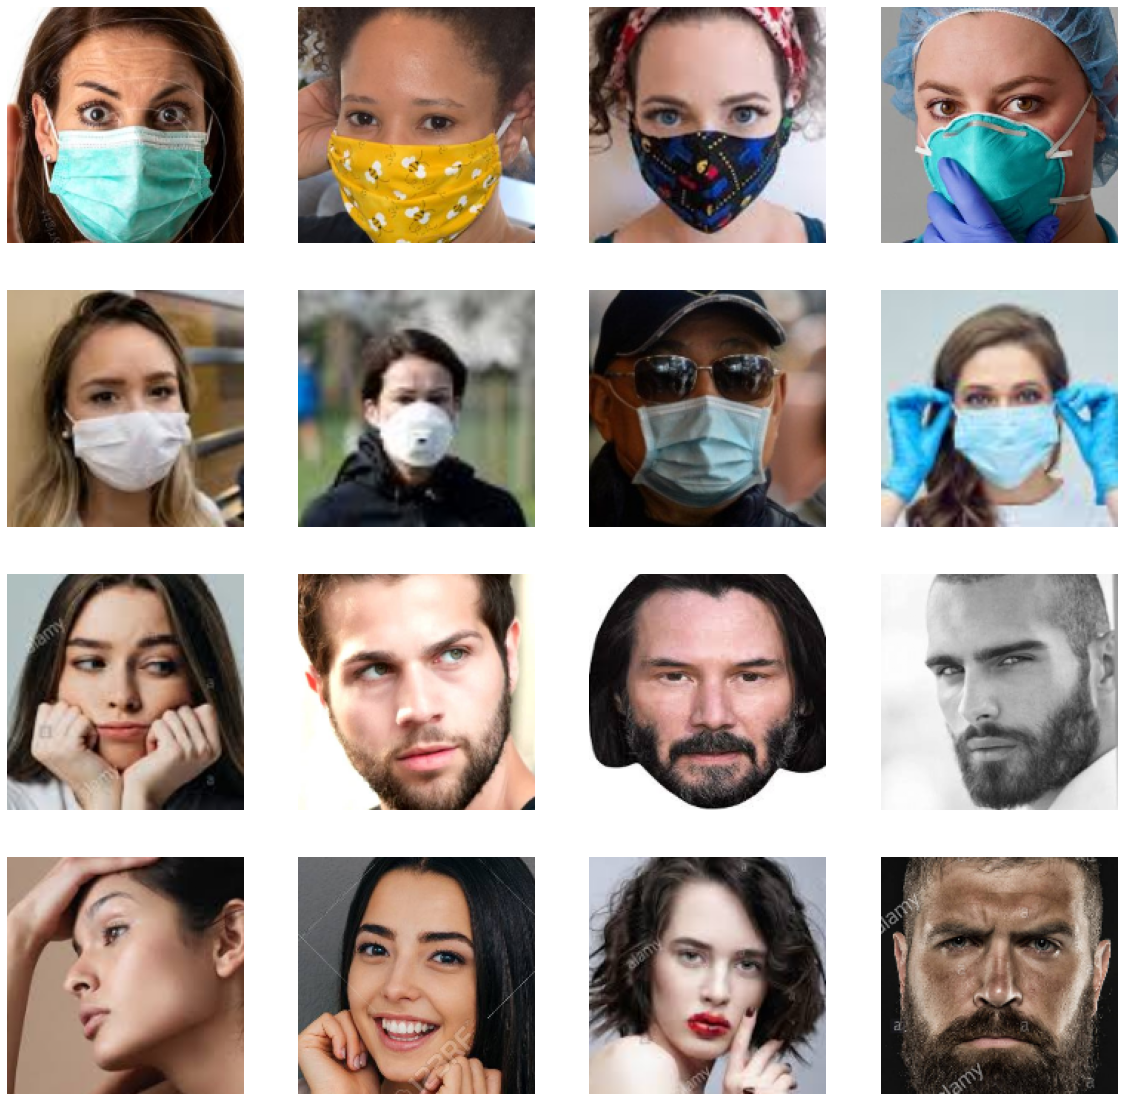

In [0]:
nrows=4
ncols=4

fig=plt.gcf()   #get the current figure
fig.set_size_inches(nrows*5,ncols*5)

train=[os.path.join(train_mask_path,train_mask_names[i]) for i in range(8)]  #names of some train_images mask
no_mask=[os.path.join(train_nomask_path,train_nomask_names[i]) for i in range(8)]  #names if train_nomask
combined=train+n_mask

for i,toplot in enumerate(combined):
  sp=plt.subplot(nrows,ncols,i+1)
  sp.axis('off')
  img=mpimg.imread(toplot)
  plt.imshow(img)
plt.plot()

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator  #import

train_gen=ImageDataGenerator(     #train Generator with Image Augmentation
    rescale=1/255.,
    shear_range=0.2,
    zoom_range=0.2,
    #horizontal_flip=True
)

test_gen=ImageDataGenerator(      #test generator without Augmentation
    rescale=1.0/255.0
)

train_generator=train_gen.flow_from_directory(
    train_path,
    target_size=(160,160),
    batch_size=32,
    class_mode='binary'
)

test_generator=test_gen.flow_from_directory(
    test_path,
    target_size=(160,160),
    batch_size=32,
    class_mode='binary'
)


Found 2206 images belonging to 2 classes.
Found 551 images belonging to 2 classes.


In [0]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense

model=Sequential([
                  Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(160,160,3)),  #conv1
                  MaxPool2D((2,2)),                                                         #max pool1
                  Conv2D(32,kernel_size=(3,3),activation='relu'),                        #conv2
                  MaxPool2D((2,2)),                                                         #maxpool2
                  Conv2D(32,kernel_size=(3,3),activation='relu'),
                  MaxPool2D((2,2)),
                  Flatten(),
                  Dense(128,activation='relu'),
                  Dense(1,activation='sigmoid')
])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 158, 158, 32)      896       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 79, 79, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 77, 77, 32)        9248      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 38, 38, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 36, 36, 32)        9248      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 18, 18, 32)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 10368)            

In [0]:
#compile and run

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])
history=model.fit_generator(train_generator,steps_per_epoch=30,epochs=25,validation_data=test_generator,validation_steps=15)

Epoch 1/25
30/30 [==============================] - 512s 17s/step - loss: 0.6110 - acc: 0.6618 - val_loss: 0.2120 - val_acc: 0.8438
Epoch 2/25
 7/30 [======>.......................] - ETA: 4:36 - loss: 0.3491 - acc: 0.8661

In [0]:
#save the model and download the weights 

model.save('/content/face_mask.h5')
from google.colab import files 
files.download('/content/face_mask.h5')

In [0]:
#testing with own image

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()
for i in uploaded.keys():
  img=image.load_img(i,target_size=(160,160))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  x=np.vstack([x])
  pred=model.predict(x)
  if(pred[0]<0.5):
    print('Mask')
  else:
    print('NO Mask')

# **Below code is the Code for bounded boz prediction. This will not work on Colab. This can be tried on Jupyter or an other IDE**

In [0]:
!pip install geocoder

     |████████████████████████████████| 102kB 2.4MB/s 


In [0]:
!pip install mtcnn

     |████████████████████████████████| 2.3MB 2.8MB/s 


In [0]:
!pip install python-resize-image

In [0]:
from datetime import datetime
import geocoder


g=geocoder.ip('me')
a=g.latlng[0]
b=g.latlng[1]

Loc='GPS: '+str(a)+' '+str(b)


In [0]:
from mtcnn import MTCNN
import cv2 
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import load_model
from resizeimage import resizeimage

detector=MTCNN()
model=load_model('/content/gdrive/My Drive/dataset/face_mask.h5')

font1=cv2.FONT_HERSHEY_TRIPLEX
font2=cv2.FONT_HERSHEY_SIMPLEX


In [0]:
cap=cv2.VideoCapture(0)
while(True):
  _,frame=cap.read()
  cv2.putText(frame,str(datetime.now()),(10,30),font1,1,(255,255,255),2,cv2.LINE_AA)
  cv2.putText(frame,Loc,(10,450),font2,1,(255,255,255),2,cv2.LINE_AA)
  cv2.putText(frame,'Pk',(480,450),font1,1,(255,255,255),2,cv2.LINE_AA)
  result=detector.detect_faces(frame)
  if(result!=[]):
    for person in result:
      bounding_box=person['box']
      keypoints=person['keypoints']
      cv2.imwrite('opencv.png',frame)
      image_file=load_img('opencv.png')
      cover=resizeimage.resize_cover(image_file,[160,160],validate=False)

      x=[]
      x=img_to_array(x)
      x=np.expand_dims(x,axis=0)
      pred=model.predict(x)

      #print(pred[0][0])
      if(pred[0][0]==0.0):
        cv2.putText(frame,"ACCESS GRANTED, MASK ON",(100,100),font1,0.8,(0,255,0),2,cv2.LINE_AA)
      elif pred[0][0]==1.0:
        cv2.putText(frame,"ACCESS Denied,No MASK! ",(100,100),font1,0.8,(0,0,255),2,cv2.LINE_AA)
      
      cv2.rectangle(
          frame,
          (bounding_box[0],bounding_box[1]),
          (bounding_box[0]+bounding_box[2], bounding_box[1] + bounding_box[3]),
          (0,155,255),
          2
      )
      cv2.circle(frame,(keypoints['left_eye']),2,(0,155,255),2)
      cv2.circle(frame,(keypoints['right_eye']),2,(0,155,255),2)
      cv2.circle(frame,(keypoints['nose']),2,(0,155,255),2)
      cv2.circle(frame,(keypoints['mouth_left']),2,(0,155,255),2)
      cv2.circle(frame,(keypoints['mouth_right']),2,(0,155,255),2)
    
    cv2.imshow('frame',frame)
    if cv2.waitKey(10) &0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()


InvalidImage: ignored